In [1]:
from neural_net_utils import *
from feature_selection_utils import *

### Sfida tra `GradientBoostingRegressor` e `RegressionNet`

#### Feature analysis e selection con `GradientBoostingRegressor` (addestrato sul dataset `movies_not_binned.csv`)

In [2]:
df = pd.read_csv('../dataset/movies_not_binned.csv')

cols_to_retain = ['rating', 'genre', 'score', 'profit', 'age', 'runtime', 'votes', 'budget',
                  'director_num_movies', 'director_age', 'director_profit_mean', 'director_profit_std', 'director_score_mean', 'director_score_std',
                  'actor_num_movies', 'actor_age', 'actor_profit_mean', 'actor_profit_std', 'actor_score_mean', 'actor_score_std']

cols = {
    'target': 'score',
    'drop': list(df.columns.difference(cols_to_retain)),
    'dummies': ['rating', 'genre'],
    'labels': [],
    'round': [],
    'clipping': ['profit', 'votes', 'budget',
                 'director_profit_mean', 'actor_profit_mean',
                 'director_profit_std', 'actor_profit_std'],
    'standardize': ['runtime', 'director_age', 'actor_age'],
    'minmax': ['age', 'profit', 'votes', 'budget',
               'director_num_movies', 'actor_num_movies',
               'director_profit_mean', 'actor_profit_mean',
               'director_profit_std', 'actor_profit_std',
               'director_score_mean', 'actor_score_mean',
               'director_score_std', 'actor_score_std']
}

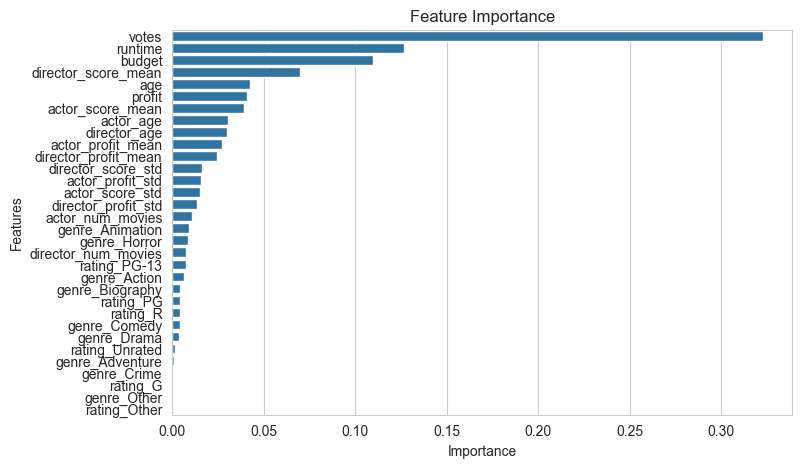

In [3]:
# studio l'importanza delle features
model_name = 'Gradient_Boosting_Regressor-not_binned'

study_model_with_best_features(model_name, df, cols, folds=5, retain='all')

In [4]:
# scelgo il numero di features da mantenere e procedo con una RFE manuale

k = 11
study_model_with_best_features(model_name, df, cols, retain=k)

Removing genre_Action with importance 0.0006319223768053162
Removing genre_Other with importance 0.00022694187016503165
Removing actor_num_movies with importance 0.0006798520963452459
Removing genre_Animation with importance 3.8268595964841e-05
Removing director_profit_mean with importance 9.663110530566676e-05
Removing genre_Comedy with importance 0.00011289034632161465
Removing rating_G with importance 0.0006401516174475153
Removing actor_score_mean with importance 0.0004920556345797134
Removing director_num_movies with importance 0.002125276093374928
Removing rating_PG with importance 0.00010361469196501494
Removing genre_Crime with importance 0.00011592610898975009
Removing actor_score_std with importance 0.000531527304211632
Removing genre_Drama with importance 4.82396922030226e-05
Removing actor_profit_std with importance 0.00045307404838035303
Removing director_profit_std with importance 2.5892917855485642e-05
Removing director_age with importance 0.0010256436186258377
Removing 

,feature
0,profit
1,age
2,runtime
3,votes
4,budget
5,director_score_mean
6,director_score_std
7,actor_age
8,actor_profit_mean
9,rating_PG-13


Results after GridSearchCV:
Best parameters: {'max_depth': 4, 'min_samples_leaf': 6, 'min_samples_split': 8}
Best score: {'mean_squared_error': 0.4319}

Results after max_depth tuning:
Best parameters: {'max_depth': 4}
Best score: {'mean_squared_error': 0.4319}



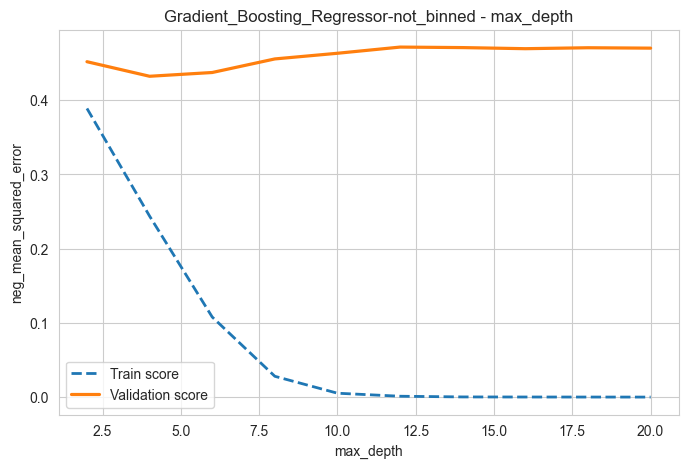

Test score:
MSE: 0.4164


In [4]:
# tuning e test dello stesso modello con le features più importanti
grid_params = {
    'max_depth': [4, 6],
    'min_samples_leaf': [6, 8, 10],
    'min_samples_split': [8, 10, 12],
}

best_features = ['votes', 'runtime', 'budget', 'age', 'profit',
                 'director_score_mean', 'actor_score_mean',
                 'director_profit_mean', 'actor_profit_mean',
                 'director_age', 'actor_age']

study_model_with_best_features(model_name, df, cols, best_features=best_features, grid_params=grid_params, task='regression')

#### Addestramento di `RegressionNet` solo sul dataset originale `movies_v2.csv`

In [5]:
df = pd.read_csv('../dataset/movies_v2.csv')

# colonne per l'addestramento
cols_to_retain = ['rating', 'genre', 'year', 'score', 'votes', 'budget', 'gross', 'runtime']

cols = {
    'target': 'score',
    'drop': list(df.columns.difference(cols_to_retain)),
    'dummies': ['rating', 'genre'],
    'labels': [],
    'round': [],
    'clipping': ['votes', 'budget', 'gross'],
    'standardize': ['runtime'],
    'minmax': ['year', 'votes', 'budget', 'gross']
}

In [6]:
train_and_test_net(df, cols, task='regression')

C:\Users\raffa\AppData\Roaming\Python\Python312\site-packages\torch\nn\modules\loss.py:538: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\raffa\AppData\Roaming\Python\Python312\site-packages\torch\nn\modules\loss.py:538: UserWarning: Using a target size (torch.Size([22])) that is different to the input size (torch.Size([22, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\raffa\AppData\Roaming\Python\Python312\site-packages\torch\nn\modules\loss.py:538: UserWarning: Using a target size (torch.Size([6])) that is different to the input size (torch.Size([6, 1])). This will likely lead to incorrect results due to broadcasting. P

Epoch 1 | train loss: 39.007329923297284, val loss: 25.932364055088588
Epoch 2 | train loss: 10.770057245132026, val loss: 2.6628290627683913
Val loss (inf --> 2.6628)


RuntimeError: Parent directory nets does not exist.

#### Addestramento di `RegressionNet` solo sul dataset `movies_not_binned.csv` (solo con le $k$ features più importanti)

In [ ]:
df = pd.read_csv('../dataset/movies_not_binned.csv')

cols_to_retain = ['rating', 'genre', 'score', 'profit', 'age', 'runtime', 'votes', 'budget',
                  'director_num_movies', 'director_age', 'director_profit_mean', 'director_profit_std', 'director_score_mean', 'director_score_std',
                  'actor_num_movies', 'actor_age', 'actor_profit_mean', 'actor_profit_std', 'actor_score_mean', 'actor_score_std']

cols = {
    'target': 'score',
    'drop': list(df.columns.difference(cols_to_retain)),
    'dummies': ['rating', 'genre'],
    'labels': [],
    'round': [],
    'clipping': ['profit', 'votes', 'budget',
                 'director_profit_mean', 'actor_profit_mean',
                 'director_profit_std', 'actor_profit_std'],
    'standardize': ['runtime', 'director_age', 'actor_age'],
    'minmax': ['age', 'profit', 'votes', 'budget',
               'director_num_movies', 'actor_num_movies',
               'director_profit_mean', 'actor_profit_mean',
               'director_profit_std', 'actor_profit_std',
               'director_score_mean', 'actor_score_mean',
               'director_score_std', 'actor_score_std']
}

In [ ]:
best_features = ['votes', 'runtime', 'budget', 'age', 'profit',
                 'director_score_mean', 'actor_score_mean',
                 'director_profit_mean', 'actor_profit_mean',
                 'director_age', 'actor_age']

train_and_test_net(df, cols, features=best_features, task='regression')

### Sfida tra `RandomForestClassifier` e `ClassificationNet`